<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   datetime                     696 non-null    datetime64[ns, UTC]
 1   temperature_2m               696 non-null    float64            
 2   wind_speed_180m              696 non-null    float64            
 3   wind_speed_120m              696 non-null    float64            
 4   direct_radiation             696 non-null    float64            
 5   quantity_biomass             696 non-null    float64            
 6   quantity_fossil_gas          696 non-null    float64            
 7   quantity_fossil_hard_coal    696 non-null    float64            
 8   quantity_hydro_run_of_river  696 non-null    float64            
 9   quantity_nuclear             696 non-null    float64            
 10  quantity_solar               696 non-null    float

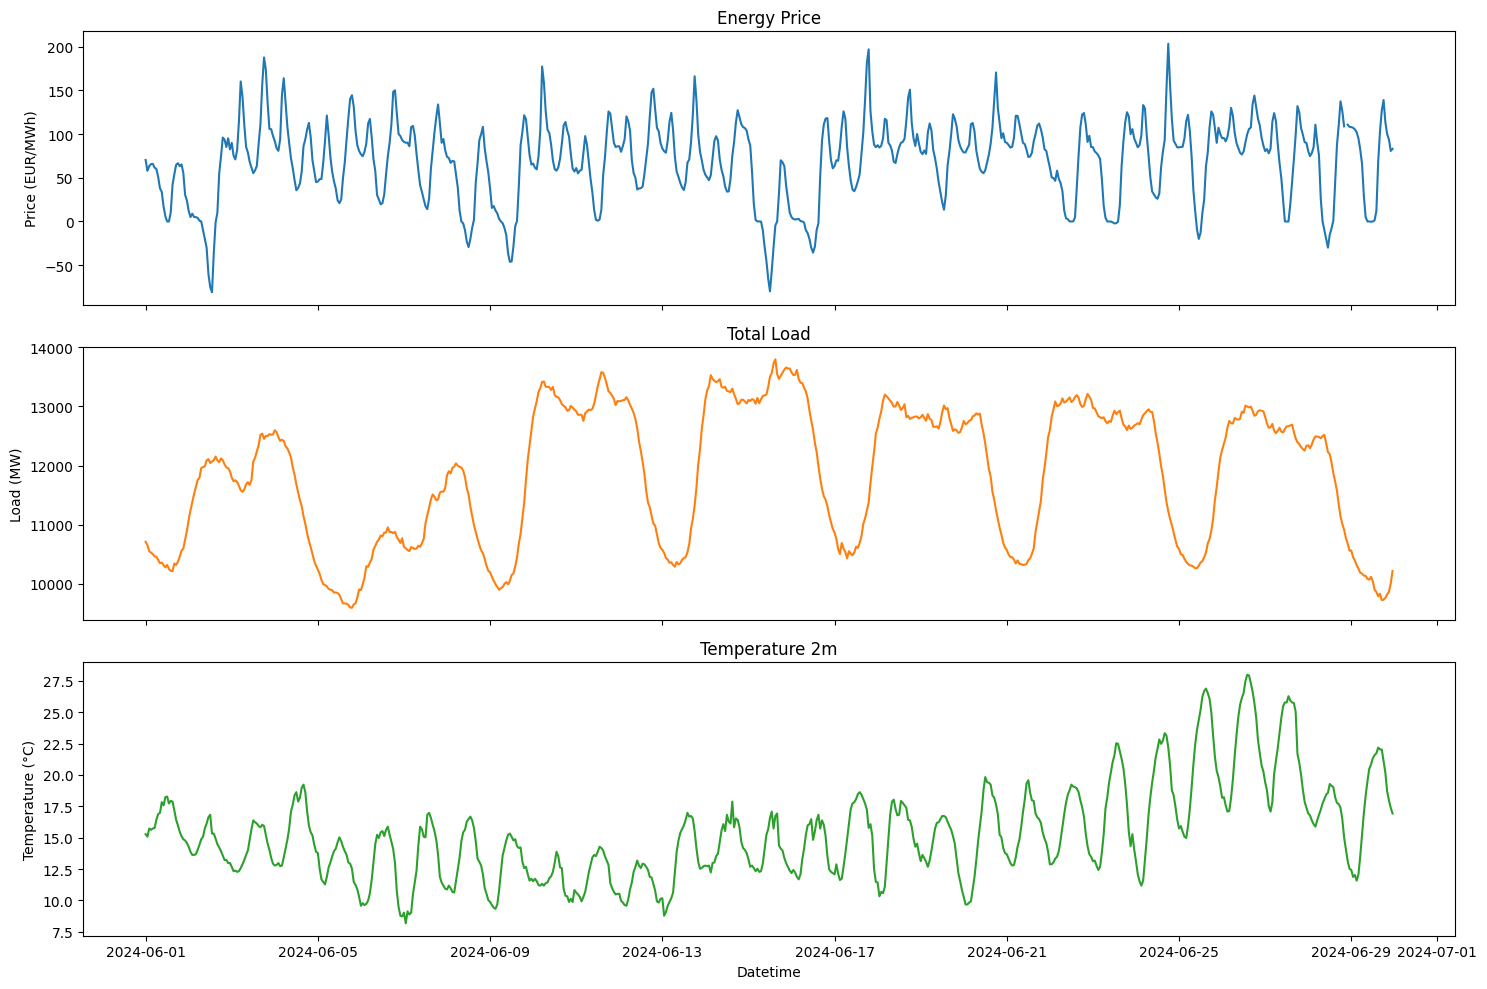

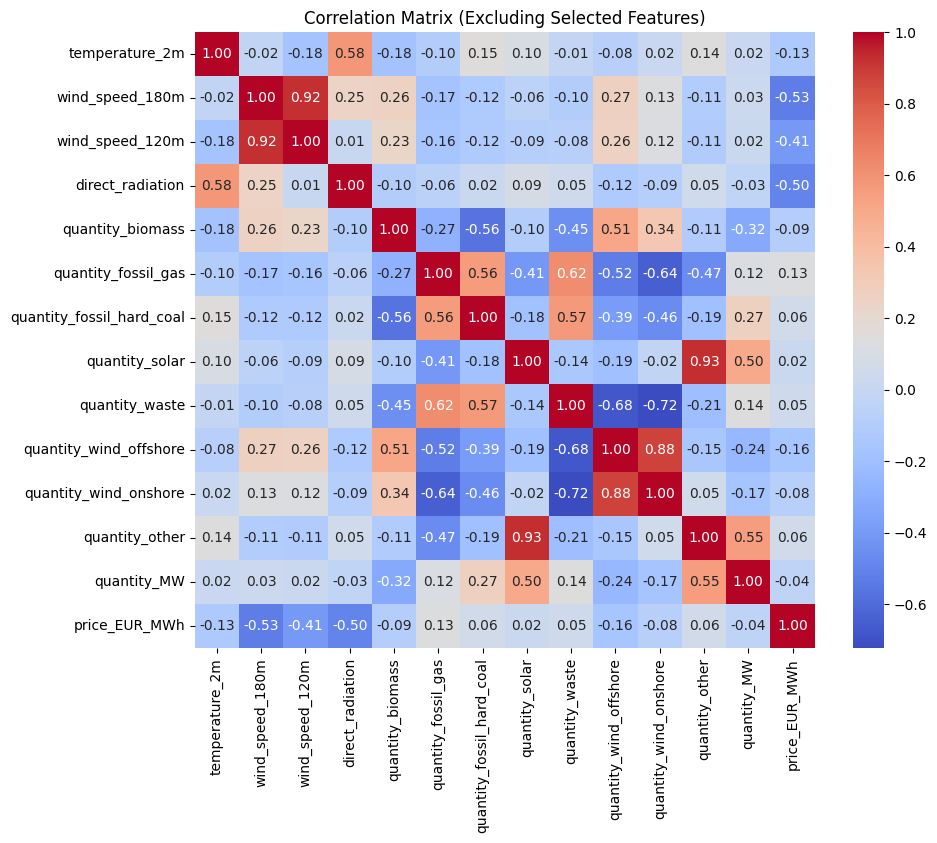

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/june_data.csv", parse_dates=["datetime"])

# Data structure
print(df.info())
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Plot time series overview (Prices, Load, Temperature)
fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

# Price plot
axs[0].plot(df["datetime"], df["price_EUR_MWh"], color="tab:blue")
axs[0].set_ylabel("Price (EUR/MWh)")
axs[0].set_title("Energy Price")

# Load plot
axs[1].plot(df["datetime"], df["quantity_MW"], color="tab:orange")
axs[1].set_ylabel("Load (MW)")
axs[1].set_title("Total Load")

# Temperature plot
axs[2].plot(df["datetime"], df["temperature_2m"], color="tab:green")
axs[2].set_ylabel("Temperature (°C)")
axs[2].set_title("Temperature 2m")
axs[2].set_xlabel("Datetime")

plt.tight_layout()
plt.show()

excluded_cols = ["quantity_hydro_run_of_river", "quantity_nuclear"]
num_cols = [col for col in df.select_dtypes(include=["float64", "int64"]).columns if col not in excluded_cols]

plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Excluding Selected Features)")
plt.show()
